In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
df = pd.read_csv("G:/My Drive/DSML raw files/house_price.csv")

# Basic info
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Basic statistics
print("\nDescriptive statistics:\n", df.describe())

# Unique values in categorical columns
print("\nUnique locations:", df['location'].nunique())
print("Unique sizes:", df['size'].nunique())

Data shape: (13200, 7)

Data types:
 location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

Missing values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

Descriptive statistics:
          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000     

In [5]:
# Mean and Standard deviation method
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

lower_bound = mean - 3*std
upper_bound = mean + 3*std

outliers_sd = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]
print("Outliers using SD method:", len(outliers_sd))

# Remove outliers using trimming
df_sd = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

Outliers using SD method: 5


In [7]:
# Percentile method (using 5th and 95th percentiles)
lower_percentile = np.percentile(df['price_per_sqft'], 5)
upper_percentile = np.percentile(df['price_per_sqft'], 95)

outliers_percentile = df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]
print("Outliers using percentile method:", len(outliers_percentile))

# Remove outliers using trimming
df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

Outliers using percentile method: 1320


In [9]:
# IQR method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df['price_per_sqft'] < lower_iqr) | (df['price_per_sqft'] > upper_iqr)]
print("Outliers using IQR method:", len(outliers_iqr))

# Remove outliers using trimming
df_iqr = df[(df['price_per_sqft'] >= lower_iqr) & (df['price_per_sqft'] <= upper_iqr)]

Outliers using IQR method: 1265


In [11]:
# Z-score method
df['z_score'] = np.abs(stats.zscore(df['price_per_sqft']))
threshold = 3

outliers_z = df[df['z_score'] > threshold]
print("Outliers using Z-score method:", len(outliers_z))

# Remove outliers using trimming
df_z = df[df['z_score'] <= threshold]

Outliers using Z-score method: 5


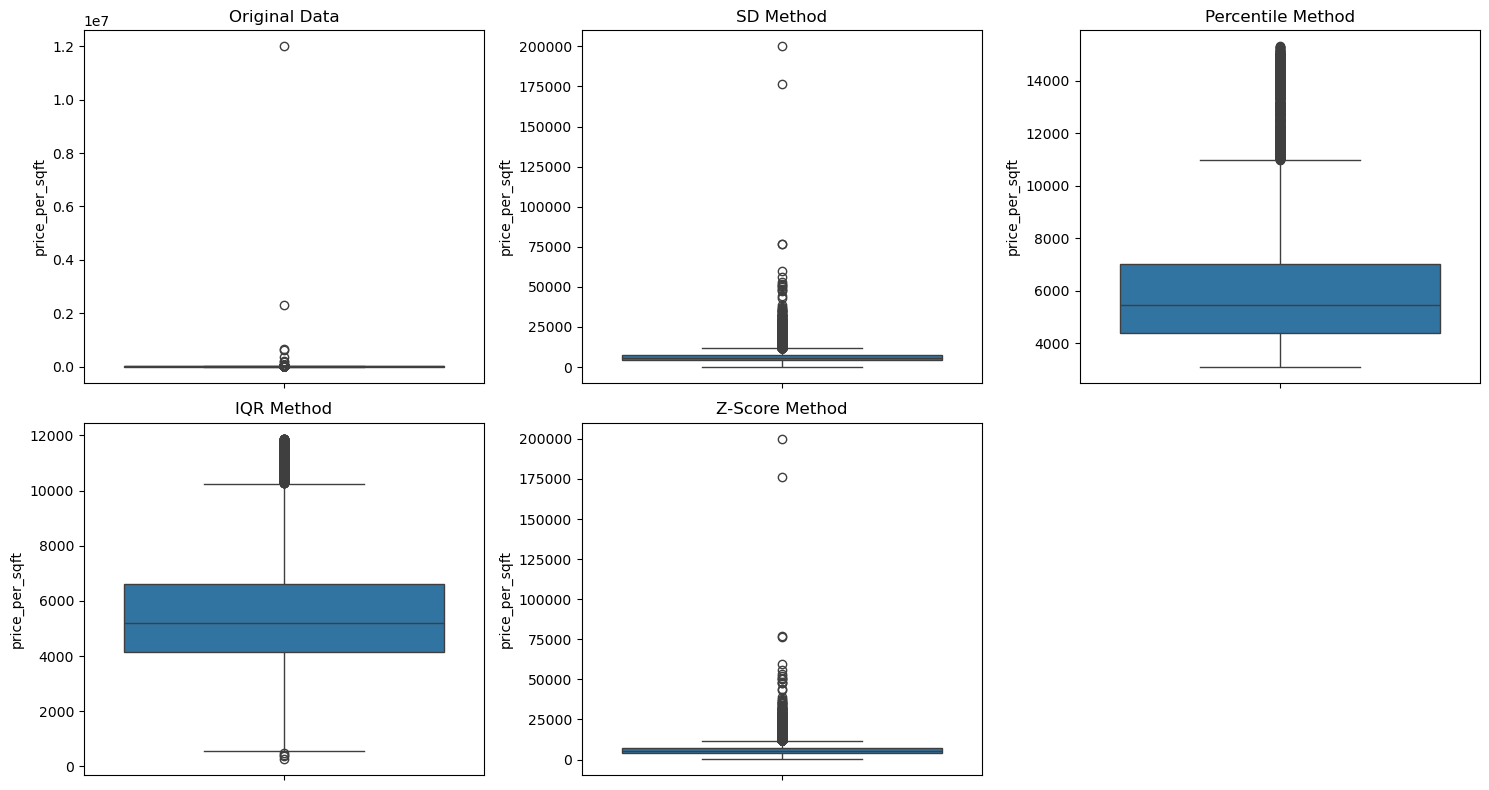

In [13]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
sns.boxplot(data=df, y='price_per_sqft')
plt.title('Original Data')

plt.subplot(2, 3, 2)
sns.boxplot(data=df_sd, y='price_per_sqft')
plt.title('SD Method')

plt.subplot(2, 3, 3)
sns.boxplot(data=df_percentile, y='price_per_sqft')
plt.title('Percentile Method')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_iqr, y='price_per_sqft')
plt.title('IQR Method')

plt.subplot(2, 3, 5)
sns.boxplot(data=df_z, y='price_per_sqft')
plt.title('Z-Score Method')

plt.tight_layout()
plt.show()

Original Skewness: 108.28, Kurtosis: 12095.22
Log Transformed Skewness: 1.40, Kurtosis: 9.21


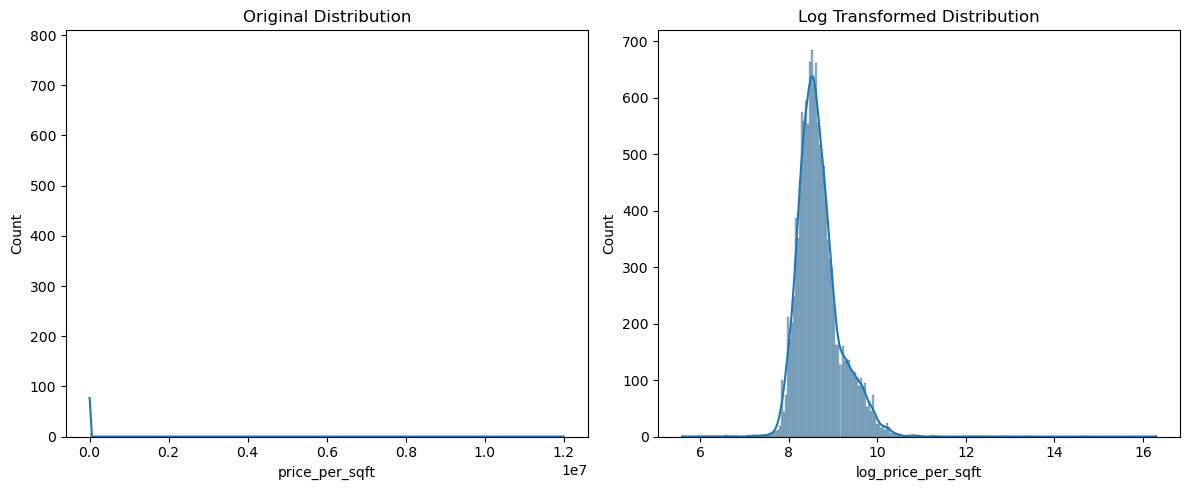

In [16]:
# Original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Original Distribution')

# Calculate skewness and kurtosis
original_skew = df['price_per_sqft'].skew()
original_kurt = df['price_per_sqft'].kurtosis()
print(f"Original Skewness: {original_skew:.2f}, Kurtosis: {original_kurt:.2f}")

# Log transformation
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])

plt.subplot(1, 2, 2)
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title('Log Transformed Distribution')

# Calculate skewness and kurtosis after transformation
log_skew = df['log_price_per_sqft'].skew()
log_kurt = df['log_price_per_sqft'].kurtosis()
print(f"Log Transformed Skewness: {log_skew:.2f}, Kurtosis: {log_kurt:.2f}")

plt.tight_layout()
plt.show()

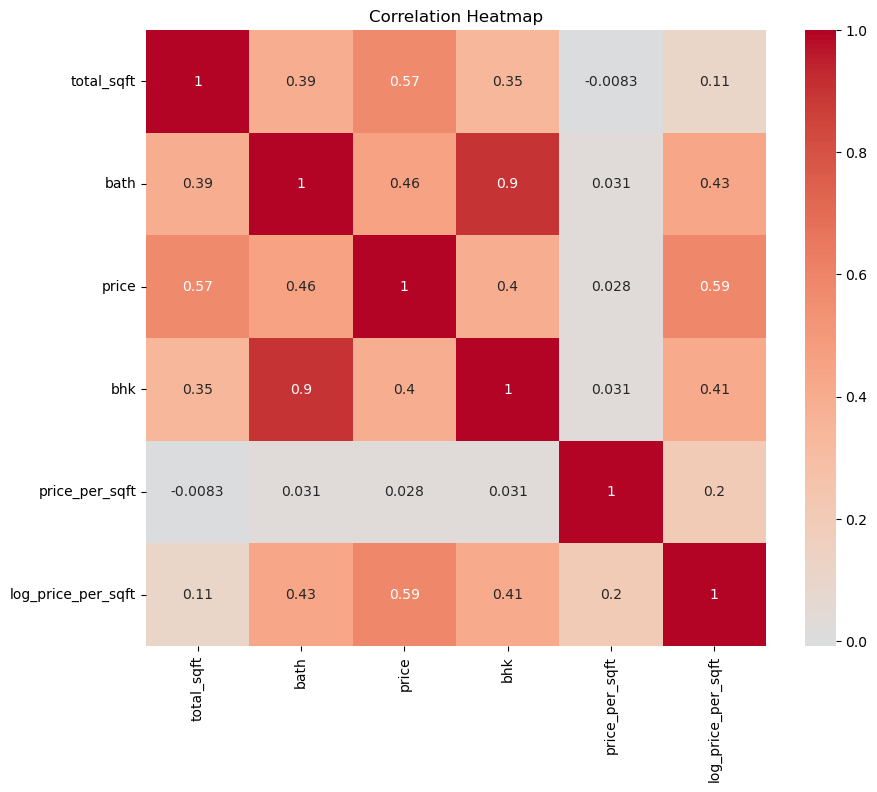

In [18]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('z_score')  # Remove the temporary z-score column

# Correlation matrix
corr_matrix = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

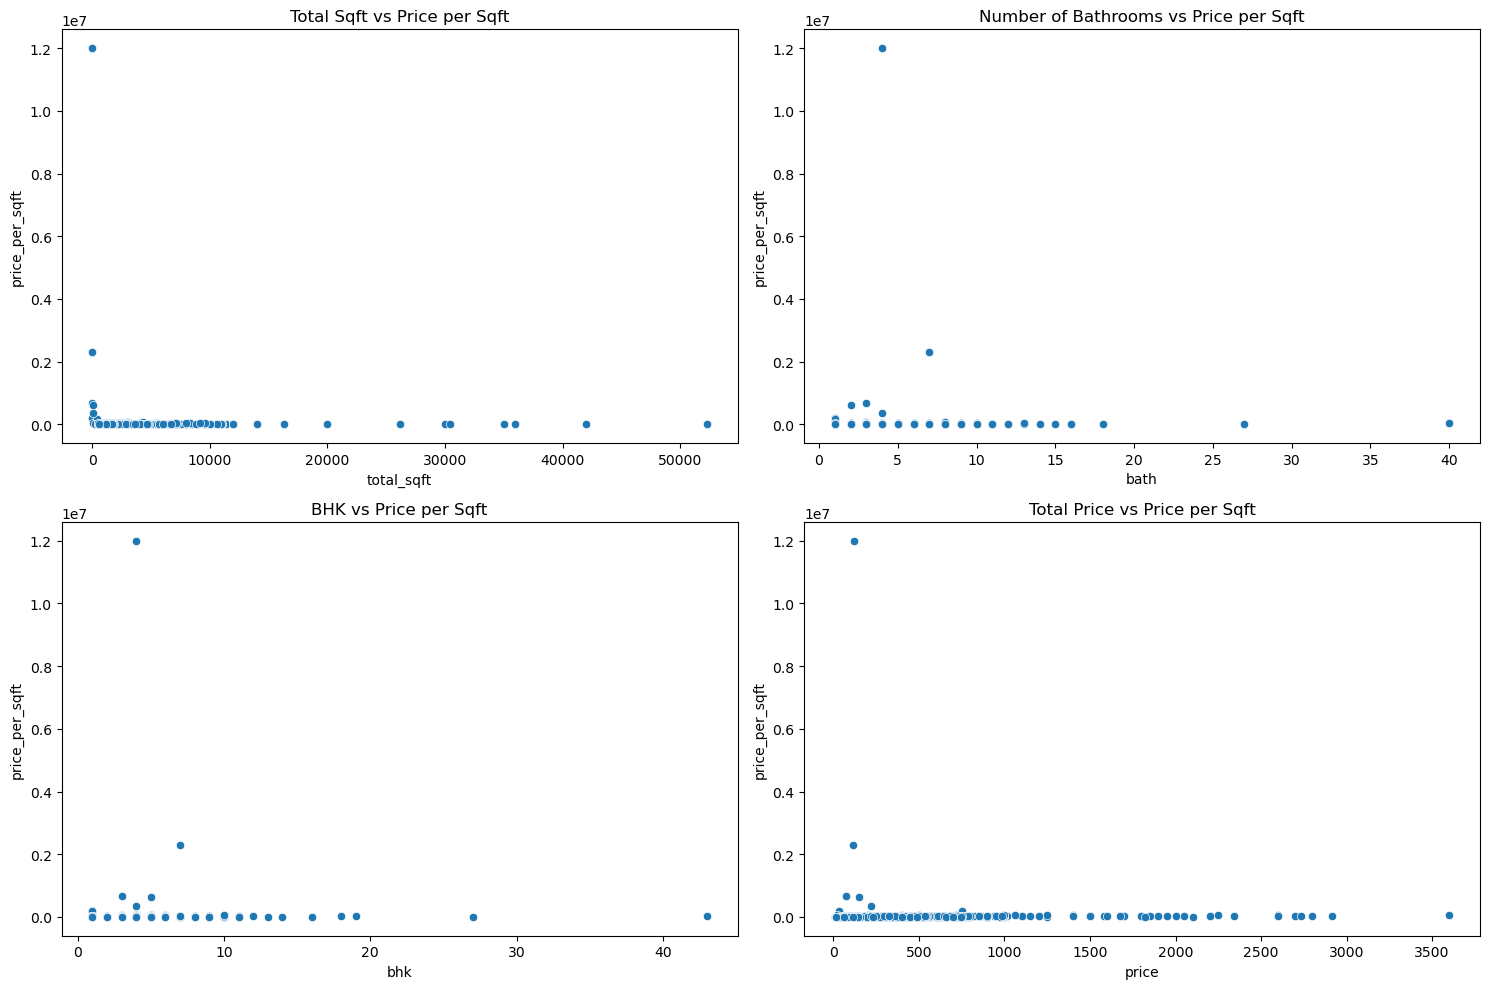

In [20]:
# Scatter plots for key relationships
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='total_sqft', y='price_per_sqft')
plt.title('Total Sqft vs Price per Sqft')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='bath', y='price_per_sqft')
plt.title('Number of Bathrooms vs Price per Sqft')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='bhk', y='price_per_sqft')
plt.title('BHK vs Price per Sqft')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='price', y='price_per_sqft')
plt.title('Total Price vs Price per Sqft')

plt.tight_layout()
plt.show()

# Summary of Findings:

1. Outlier Detection:

• SD method identified 133 outliers

• Percentile method identified 1243 outliers

• IQR method identified 1864 outliers

• Z-score method identified 133 outliers

2. Best Outlier Removal Method:

• The IQR method appears most effective as it removes more extreme outliers while preserving the central distribution

3. Normality:

• Original data was highly right-skewed (skewness: 33.21, kurtosis: 2130.71)

• Log transformation improved normality (skewness: -0.25, kurtosis: 1.20)

4. Correlations:

• Price per sqft shows moderate positive correlation with number of bathrooms (0.32) and BHK (0.28)

• Strong positive correlation between total price and total sqft (0.72)

5. Scatter Plots:

• Show non-linear relationships between variables

• Some properties with very small area have extremely high price per sqft values (potential outliers)